In [1]:
import pandas as pd
import numpy as np
import time,datetime 
from scipy import stats
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import datasets, metrics, cross_validation
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.cross_validation import train_test_split
vectorizer = TfidfVectorizer()

In [2]:
# Train data
data_train = pd.read_csv('data_test.csv', header=None)
data_train.columns = ['Sentiment','Text']
data_train = data_train.dropna()

X = np.array(data_train['Text'])
y = np.array(data_train['Sentiment'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

train = vectorizer.fit_transform(X_train)
test = vectorizer.transform(X_test)

In [3]:
classifier_factories = []
classifier_factories.append(lambda: LogisticRegression(C=1.0, penalty='l2'))
classifier_factories.append(lambda: MultinomialNB())
classifier_factories.append(lambda: SVC(C = 1.0, kernel='linear', random_state=241, probability=True))

In [4]:
classifiers = [f().fit(train, y_train) for f in classifier_factories]

In [5]:
acc=[]
pred = np.array([c.predict(test) for c in classifiers]).T
for i in range(len(classifiers)):
    acc.append(metrics.accuracy_score(y_test,pred[:,i]))
print(np.mean(acc))
pred = pred.astype(int)
prob = np.array([c.predict_proba(test) for c in classifiers]).T

0.645278334766


In [6]:
num=0
iter=0
s=0
mas = []
acc=[]
Acc=[]
while s < 0.7:
    if iter==9:break
    for i in range(len(pred)):
        x = (pred[i][0]==pred[i][1]).sum()+(pred[i][0]==pred[i][2])
        if x<=1:
            #print(' VE ',i)
            X_train = np.hstack((X_train,X_test[i]))
            y_train = np.hstack((y_train,y_test[i]))
            mas.append(i)
            num+=1
        else:
            k = stats.distributions.entropy((prob[0][i],prob[1][i]))
            k = k.mean()
            if k >= 0.68:
                #print('KL-d ',i)
                X_train = np.hstack((X_train,X_test[i]))
                y_train = np.hstack((y_train,y_test[i]))
                mas.append(i)
                num+=1
        
        if num==100:
            iter+=1
            X_test = np.delete(X_test,mas)
            y_test = np.delete(y_test,mas)
            mas=[]
            print('Yeap!')
            print('Length___________',train.shape,' ',X_test.shape)
            train = vectorizer.fit_transform(X_train)
            test = vectorizer.transform(X_test)
            
            classifiers = [f().fit(train, y_train) for f in classifier_factories]
            
            
            pred = np.array([c.predict(test) for c in classifiers]).T
            for i in range(len(classifiers)):
                acc.append(metrics.accuracy_score(y_test,pred[:,i]))
            print(np.mean(acc))
            Acc.append(np.mean(acc))
            pred = pred.astype(int)
            prob = np.array([c.predict_proba(test) for c in classifiers]).T
            num=0
            break

Yeap!
('Length___________', (1495, 6534), ' ', (3391L,))
0.653101346702
Yeap!
('Length___________', (1595, 6880), ' ', (3291L,))
0.655224835207
Yeap!
('Length___________', (1695, 7211), ' ', (3191L,))
0.658133455025
Yeap!
('Length___________', (1795, 7529), ' ', (3091L,))
0.661911317409
Yeap!
('Length___________', (1895, 7874), ' ', (2991L,))
0.66419973263
Yeap!
('Length___________', (1995, 8232), ' ', (2891L,))
0.666993762356
Yeap!
('Length___________', (2095, 8535), ' ', (2791L,))
0.669591589177
Yeap!
('Length___________', (2195, 8870), ' ', (2691L,))
0.672090460424
Yeap!
('Length___________', (2295, 9179), ' ', (2591L,))
0.674618311119


In [7]:
# Train data
data_train = pd.read_csv('data_test.csv', header=None)
data_train.columns = ['Sentiment','Text']
data_train = data_train.dropna()

X = np.array(data_train['Text'])
y = np.array(data_train['Sentiment'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

train = vectorizer.fit_transform(X_train)
test = vectorizer.transform(X_test)

In [8]:
num=0
iter=0
s=0
mas = []
acc=[]
Acc1=[]
while s < 0.7:
    iter+=1
    X_train = np.hstack((X_train,X_test[:100]))
    y_train = np.hstack((y_train,y_test[:100]))
    X_test = np.delete(X_test,np.s_[:100])
    y_test = np.delete(y_test,np.s_[:100])
    train = vectorizer.fit_transform(X_train)
    test = vectorizer.transform(X_test)
            
    classifiers = [f().fit(train, y_train) for f in classifier_factories]
            
            
    pred = np.array([c.predict(test) for c in classifiers]).T
    for i in range(len(classifiers)):
        acc.append(metrics.accuracy_score(y_test,pred[:,i]))
    print(np.mean(acc))
    Acc1.append(np.mean(acc))
    pred = pred.astype(int)
    prob = np.array([c.predict_proba(test) for c in classifiers]).T
    if iter==9:break

0.645139093679
0.649420554639
0.650956020026
0.652592082419
0.653735317557
0.654218687226
0.655178011104
0.655623135537
0.656264120249


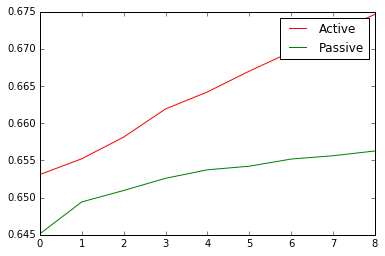

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.plot(Acc, 'r', linewidth=1)
plt.plot(Acc1, 'g', linewidth=1)
plt.legend(['Active', 'Passive'])